In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# defining some constants

L = 1; # the width of the well
A = np.sqrt(2 / L); # normalisation constant
num = 4; # setting the value of the principal quantum number n, which defines the state of our wavefunction
length = 250 # used to determine the length of arrays

In [3]:
def psi(x, n):
    """
    Function to return the value of the wavefunction using the analytic solution to the Schrodinger equation for
    this system
    
    Returns:
        value : float
        The value of the wavefunction at x
        
    Parameters:
        x : float
        The x coordinate of the system
        
        n : integer
        Describes which state the wavefunction is in
    """
    
    value = A * np.sin( (n * np.pi * x / L) )
   
    return value

In [4]:
def wavefunction(l, n):
    """
    Function to create the shape of the wavefunction
    
    Returns: 
        wav : array
        
    Parameters:
        l : integer
            determines the length of the outputted array (array is 4 times this length)
            
        n : integer
            describes the state of the wavefunction
    """
    
    l = int(l) # making sure that the inputted value for x is an integer
    
    wav = np.zeros(4 * l) # initialising an array of zeros
    
    for x in range(0, 2 * l):
        wav[length - 1 + x] = psi(x / (2 * l), n)
    
    
    return wav

In [5]:
def animate(t):
    """
    this function gets called by animation (imported from matplotlib)
    each time called, it will replot with a different values for t
    
    Parameters:
        t : float
            used as a counter to display different frames of the animation 
    
    """
    
    # create our real and imaginary wavefunction objects
    f = wavefunction(length, num) * np.exp(-1j * t)
    
    wave_real.set_ydata(f.real)
    wave_imag.set_ydata(f.imag)
    wave_mag.set_ydata(np.sqrt(f.real**2 + f.imag**2))
    
    # create prob. dist. object
    F = wavefunction(length, num)**2
    prob.set_ydata(F)
    
    # adjust the wave plot height in a loop, in case wave height changes (it doesnt, but useful to know in principle)
    ax1.set_ylim(-2, 2)

<IPython.core.display.Javascript object>


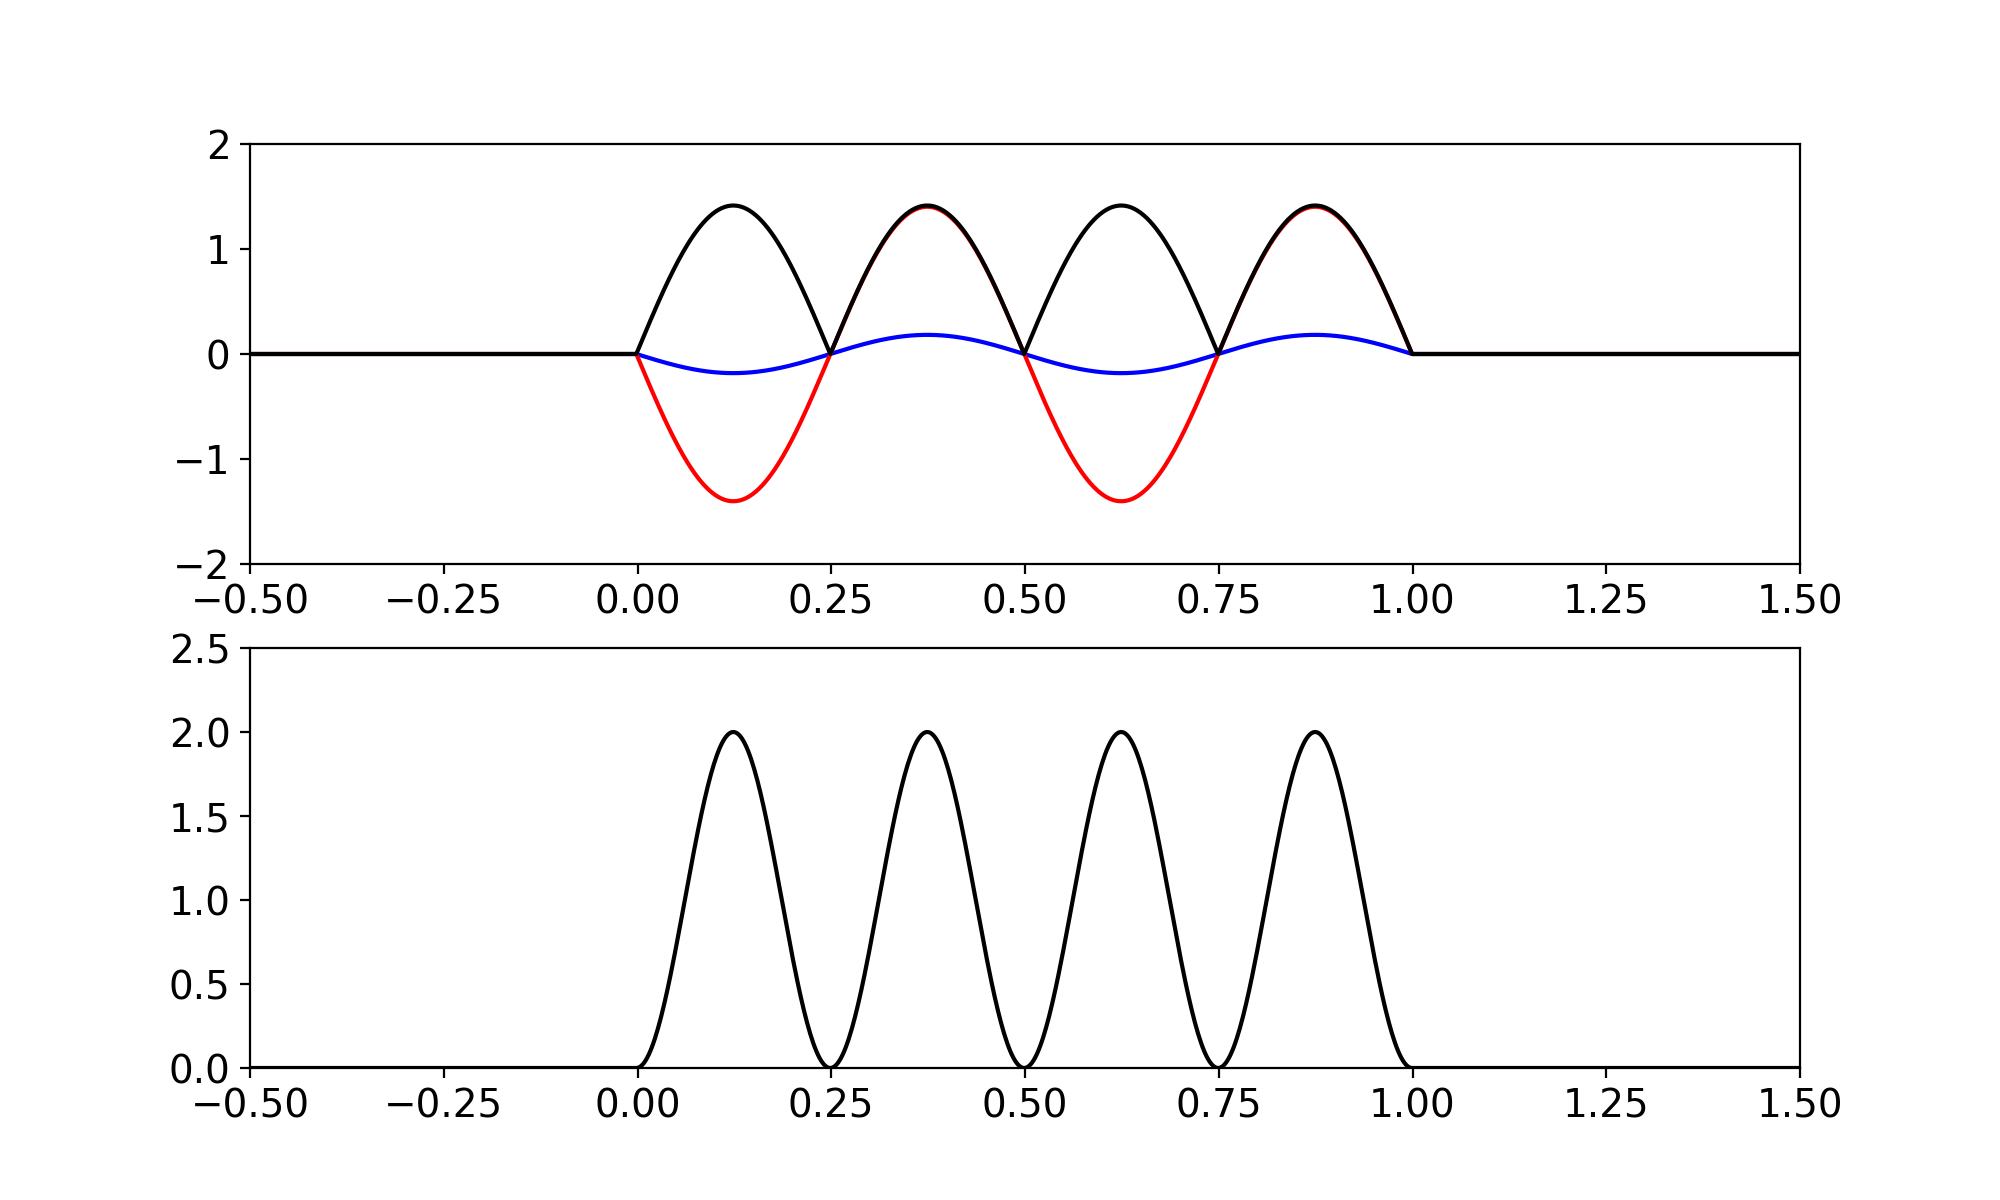

In [10]:
# required to display animated plots
%matplotlib notebook

xvals = np.linspace(-0.5, 1.5, 4 * length) # array of x values for plotting

# create figure (and axes) object
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 6)) # first argument of subplots is number of sets of axes

# creating our line objects for the plots (initialise the plots)
wave_real, = ax1.plot(xvals, wavefunction(length, num), '-b') # doesnt really matter what is in these plots,
wave_imag, = ax1.plot(xvals, wavefunction(length, num), '-r') # as animation changes them immediately  
wave_mag, = ax1.plot(xvals, wavefunction(length, num), '-k')
prob, = ax2.plot(xvals, wavefunction(length, 1)**2, '-k')  
    
def init():
    """
    initialize the figure object 
    
    Returns:
        wave_real : a line object that will form the first frame of the plot
        
        wave_imag : see above
        
        prob : see above
        
        wave_mag : see above
    
    """
    
    ax1.set_xlim(-0.5, 1.5)
    ax2.set_xlim(-0.5, 1.5)
    ax2.set_ylim(0, 2.5)
    plt.rcParams.update({'font.size':14}) # update the font size
    
    return wave_real, wave_imag, prob, wave_mag

# the FuncAnimation function iterates through our animate function using the steps array
step = 0.1 # stepsize of the widths 
steps = np.arange(0, 200, step)
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True) 
    # animation object, give it the figure object, the animate function, the input for the animate function,
    # the intialising function, interval - amount of time between each frame, blitting reduces time

plt.show()

In [7]:
help(ani)

Help on FuncAnimation in module matplotlib.animation object:

class FuncAnimation(TimedAnimation)
 |  FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs)
 |  
 |  Makes an animation by repeatedly calling a function *func*.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in *frames*.   Any additional positional
 |     arguments can be supplied via the *fargs* parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists
 |  
 |     If ``blit == True``, *func* must return an iterable of all artists
 |     that were modified or created. This information is used by the blitting
 |     algorithm to determine which parts of the figure have to be updated.
 |     The retur